# **MÓDULO 14 - AULA 1**
# Importância da Limpeza e Tratamento de Dados

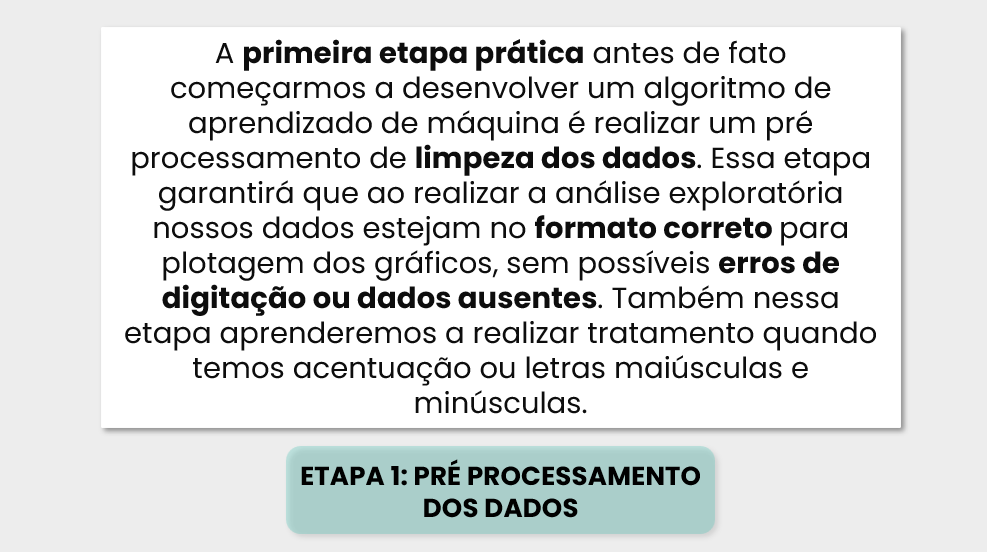

# **EXEMPLO 1 - IDADES**

Abaixo criei um dataframe que contem uma coluna de idades, propositalmente coloquei dados que indicam problema de digitação no preenchimento, acreditem acontece muito.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Criando um DataFrame com algumas idades para exemplo
dados = {
    'Idade': [25, 30, 35, 400, 45, 50, 554, 60, 60, 24, 233, 70, 26]
}

df = pd.DataFrame(dados)
print(df)

    Idade
0      25
1      30
2      35
3     400
4      45
5      50
6     554
7      60
8      60
9      24
10    233
11     70
12     26


Imaginem que pulamos a etapa de pré processamento dos dados e fomos diretamente para a análise exploratória trazendo a média das idades:

In [ ]:
df['Idade'].mean()

124.0

Agora imagine você apresentar para seu gestor ou demandante do pedido da análise que a **média da idade dos clientes é 124 anos**, eles logo te questionaram pela falta de atenção, pois tem algo de errado com esse número!


# **EXEMPLO 2 - CIDADES**

Outro problemas que costuma ser frequente na qualidade dos dados:

- Acentuação

- Erros de Digitação

- Letras Maiúsculas e Minúsculas



In [ ]:
dados = {
    'Idade': [25, 30, 35, 400, 45, 50, 554, 60, 60, 24, 233, 70, 26],
    'Cidade': ['São Paulo', 'Salvador', 'Curitiba', 'Sao Paulo', 'Salvador', 'Curitiba', 'Sao Paulo', 'Salvador', 'salvador', 'Curtiba','São Paulo','São Paulo','salvador']
}

df = pd.DataFrame(dados)
print(df)

    Idade     Cidade
0      25  São Paulo
1      30   Salvador
2      35   Curitiba
3     400  Sao Paulo
4      45   Salvador
5      50   Curitiba
6     554  Sao Paulo
7      60   Salvador
8      60   salvador
9      24    Curtiba
10    233  São Paulo
11     70  São Paulo
12     26   salvador


Vamos trazer a média das idades por cidade realizando um agrupamento por cidades como vimos no módulo de estatística básica.

In [ ]:
df.groupby('Cidade')['Idade'].mean().reset_index()

,Cidade,Idade
0,Curitiba,42.500000
1,Curtiba,24.000000
2,Salvador,45.000000
3,Sao Paulo,477.000000
4,São Paulo,109.333333
5,salvador,43.000000


Notem que nesse exemplo as cidades que deveriam estar agrupadas acabam se repetindo.

- Curitiba contém um erro de digitação

- São Paulo aparece com e sem acentuação


- Salvador aparece hora com a primeira letra maiuscula e hora sem.

Se não realizarmos o tratamento desses dados dificilmente chegaremos a média correta das idades por cidade.

# Quando você for construir e alimentar sua fonte de dados procure sempre padronizar a acentuação - **preferencialmente não utilizar** -, sempre procurar por erros de digitação e sempre manter **TODAS** as letras ou maiúscula ou minúsculas.

# **EXEMPLO 3 - SALÁRIO**

Muitas vezes também acabamos lidando com valores ausentes nas nossas bases de dado.
Isso acontece pois muitos clientes acabam não fornencendo todos seus dados ou até mesmo por conta de falhas na coleta dos dados.

In [ ]:
dados = {
    'Idade': [25, 30, 35, 400, 45, 50, 554, 60, 60, 24, 233, 70, 26],
    'Cidade': ['São Paulo', 'Salvador', 'Curitiba', 'Sao Paulo', 'Salvador', 'Curitiba', 'Sao Paulo', 'Salvador', 'salvador', 'Curtiba','São Paulo','São Paulo','salvador'],
    'Salario': ['1200,0', '0', '4000,0', '0', '5000,0', '1500,0', '0', '0', '0', '3000,0','2500,0','3000,0','0']
}

df = pd.DataFrame(dados)
print(df)

    Idade     Cidade Salario
0      25  São Paulo  1200,0
1      30   Salvador       0
2      35   Curitiba  4000,0
3     400  Sao Paulo       0
4      45   Salvador  5000,0
5      50   Curitiba  1500,0
6     554  Sao Paulo       0
7      60   Salvador       0
8      60   salvador       0
9      24    Curtiba  3000,0
10    233  São Paulo  2500,0
11     70  São Paulo  3000,0
12     26   salvador       0


Vejam que no dataframe acima algumas linhas estão sem o preenchimento dos dados de salário, retornando então 0. Em uma primeira olhada você pode até pensar que por ter outras linhas preenchidas os valores faltantes podem não afetar sua analise.

Mas notem que a cidade de salvador não tem 1 linha se quer preenchida com o campo de salário.
Vocês já sabem que os modelos de machine learning de aprendizado supervisionado utilizam dados históricos para aprender com esses dados.
Imaginem que nosso modelo tivesse a proposta de prever exatamente o salário apenas analisando a idade e cidade. Bem, se nosso modelo não tiver exemplos para a cidade de Salvador isso pode enviezar seus resultados sempre que essa cidade aparecer. Nosso modelo trará uma conclusão distorcida de que sempre nessa cidade o salário será 0.

Outro fator é que quanto mais dados ausentes, mais dificultosa será a aprendizagem do modelo. O modelo precisa do máximo de informação possível.

**Usando esse mesmo exemplo da coluna salário irei demonstrar outro fator crucial que influência no tratamento dos dados.**

In [ ]:
df['Salario'].mean()

TypeError: Could not convert 1200,004000,005000,01500,00003000,02500,03000,00 to numeric

Vejam que por conta da virgula, ele entende essa coluna como sendo string e não numérica e por isso não consegue aplicar nenhuma função matemática.

É crucial que nós analisemos os tipos de dados antes de iniciar qualquer análise ou modelo.

# **MÓDULO 14 - AULA 2**
# Verificando e tratando tipos de Dados

O primeiro problema que lidamos na aula passada e que ensinarei para vocês é o tratamento dos tipos de dados do nosso dataframe.

Antes de avançarmos quero apresentar para vocês **a primeira base que trabalharemos** no nosso curso, nossa **base de análise de crédito**.
A proposta dela é que após aplicarmos todas nossas etapas de processamento de dados apliquemos nosso primeiro modelo de machine learning nela.
Tentando identificar quais são os **clientes propensos ao Churn**.


# **Churn** é um termo utilizado em empresas para descrever a taxa de perda ou cancelamento de clientes ao longo do tempo

Quer saber mais sobre churn? Dê uma lida nesse artigo: [Entendendo Churn](https://www.heap.io/topics/master-customer-churn-and-massively-improve-retention)

In [ ]:
df = pd.read_csv("CHURN_CREDIT_MOD08.csv", delimiter=';')

df.head(10)

<ipython-input-102-cc1358a1a817>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CHURN_CREDIT_MOD08.csv", delimiter=';')


,CustomerId,Sobrenome,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balance,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,15813451,Fleetwood-Smith,677,Spain,Male,18.0,5,134796.87,2,1.0,0.0,114858.9,0.0
1,15641688,Collier,644,Spain,Female,18.0,7,0.00,1,0.0,1.0,74564.41,0.0
2,15757821,Burgess,641,Spain,Male,18.0,1,0.00,2,0.0,1.0,41542.95,0.0
3,15673180,Onyekaozulu,826,Spain,Male,18.0,2,0.00,2,0.0,1.0,16245.25,0.0
4,15664543,Tuan,774,Spain,Female,18.0,1,185891.54,1,1.0,0.0,175072.41,0.0
5,15673180,Onyekaozulu,688,Spain,Female,18.0,2,0.00,2,1.0,0.0,98349.13,0.0
6,15641688,Collier,803,Spain,Male,18.0,6,0.00,1,0.0,0.0,59645.24,1.0
7,15672940,Yevseyev,578,Spain,Female,18.0,8,71843.15,2,0.0,1.0,112649.22,0.0
8,15694192,Nwankwo,598,Spain,Male,18.0,6,0.00,2,0.0,1.0,173783.38,0.0
9,15585867,Iroawuchi,624,Spain,Female,18.0,6,0.00,2,0.0,1.0,117038.96,0.0


Notem que logo de cara já recebemos um aviso na tela.
Sempre que temos warnings acima do retorno do nossos códigos precisamos nos atender e tomar cuidado. Nesse caso ele indica que algumas colunas contém mais de 1 tipo de dados, o que pode afetar o processamento.

# Agora vamos aprender sobre cada campo da nossa tabela, não adianta tratarmos os dados das colunas sem antes interpretar cada um.



*   **CustomerID** : Esse é o ID único de cada cliente nosso.
* **Sobrenome**: Essa é bem intuitiva é o sobrenome de cada cliente.
* **Credit_Score**: É o Score de crédito de cada cliente, muito semelhante aquele número que o serasa e outras empresas atribuem para os clientes. Quer saber mais sobre score de crédito? [Acesse esse link](https://www.investopedia.com/terms/c/credit_score.asp)
* **Pais**: O pais de cada cliente.
* **Idade**: A idade de cada cliente.
* **Tempo_Credito**: Há quanto tempo nosso cliente utiliza produtos de crédito na nossa empresa - ANOS-.
* **Balance**: é o balanço final do nosso cliente, o quanto ele tem em aberto conosco para ainda pagar.
* **Qtde_Produtos**: Quantos produtos ele tem contratado com a gente.
* **Possui_Cartao**: Se ele possui cartão de crédito.
* **Membro_Ativo**: Se atualmente ele é um membro ativo na nossa empresa.
* **Salario_anual**: Salário anual do nosso cliente em dólares por ano.
* **Churn**: Ne nosso cliente deu churn,** 1 para clientes que nos abandonaram e 0 para clientes que ainda estão conosco!**




In [ ]:
# Com esse comando conseguimos verificar qual o tipo de dado de cada coluna.
df.dtypes

CustomerId         int64
Sobrenome         object
Credit_Score       int64
Pais              object
Genero            object
Idade            float64
Tempo_Credito      int64
Balance          float64
Qtd_Produtos       int64
Possui_Cartao    float64
Membro_Ativo     float64
Salario_Anual     object
Churn            float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CustomerId     100000 non-null  int64  
 1   Sobrenome      100000 non-null  object 
 2   Credit_Score   100000 non-null  int64  
 3   Pais           100000 non-null  object 
 4   Genero         99990 non-null   object 
 5   Idade          99794 non-null   float64
 6   Tempo_Credito  100000 non-null  int64  
 7   Balance        100000 non-null  float64
 8   Qtd_Produtos   100000 non-null  int64  
 9   Possui_Cartao  100000 non-null  float64
 10  Membro_Ativo   100000 non-null  float64
 11  Salario_Anual  100000 non-null  object 
 12  Churn          99911 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 9.9+ MB


Vocês já viram no curso o que cada tipo de dado representa mas vamos relembrar (como dizia um professor que eu tive, relembrar é ser feliz 2x) rapidamente os principais:


**Float:** Números decimais (1.29, 20.2, 34.2)


**Objetct:** Uma clase genérica, seu valor pode ser de qualquer tipo, ocorre principalmente quando temos mais de 1 tipo de dados por coluna.


**Str:** Cadeia de Caracteres, representa palavras.


**Int:** Números Inteiros (1, 2, 4, 100, -10)


**Bool:** Valores booleanos (True ou False)

In [ ]:
# Nossas variáveis que não condizem com seu tipo correto de dados é a salario_anual e churn, precisamos definir ambas como
# variaveis numéricas

In [ ]:
# Para converter a coluna salário anual para float, primeiro identificamos a coluna do nosso df a ser modificada e em seguida
# aplicamos o astype e dentro do parêntese o tipo de dado que queremos
df['Salario_Anual'] = df['Salario_Anual'].astype(float)

ValueError: could not convert string to float: '38.190.168'

Notem que recebemos um erro bem interessante, ele diz não poder converter a string para float, isso se dá pois na nossa coluna temos o . separando os valores.

In [ ]:
# Removendo os pontos da coluna Salario_Anual
df['Salario_Anual'] = df['Salario_Anual'].str.replace('.', '', regex=False)
# Fazendo a conversão novamente dos dados
df['Salario_Anual'] = df['Salario_Anual'].astype(float)

Vamos conferir se funcionou?

In [ ]:
df.dtypes

CustomerId         int64
Sobrenome         object
Credit_Score       int64
Pais              object
Genero            object
Idade            float64
Tempo_Credito      int64
Balance          float64
Qtd_Produtos       int64
Possui_Cartao    float64
Membro_Ativo     float64
Salario_Anual    float64
Churn            float64
dtype: object

Agora só falta realizarmos a transformação da coluna Churn.

In [ ]:
df['Churn'] = df['Churn'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

Vamos tentar entender o erro que nos aparece:

Cannot Convert: Semelhante ao erro anterior, ele está sinalizando que não pode converter.

Non-finite values (NA or inf): Aqui ele indica a causa de não poder converter, pois temos ou valores infititos ou valores NA (que são os faltantes)

**Nesse caso ainda não iremos resolver esse problema de tipo de dado.**

Mais a frente aplicaremos um modelo de machine learning nessa base exatamente para brever os clientes a churn, ou seja, a coluna a ser prevista é CHURN.
Sempre que precisamos realizar uma substituição de dados dessa coluna não podemos apenas ignorar e apagar as linhas de dados faltantes, precisamos analisar qual a % de valores faltantes e se existe a possibilidade de atribuirmos outro valor.
Veremos isso na aula a seguir!



# **MÓDULO 14 - AULA 3**
# Tratamento de dados Ausentes e Nulos

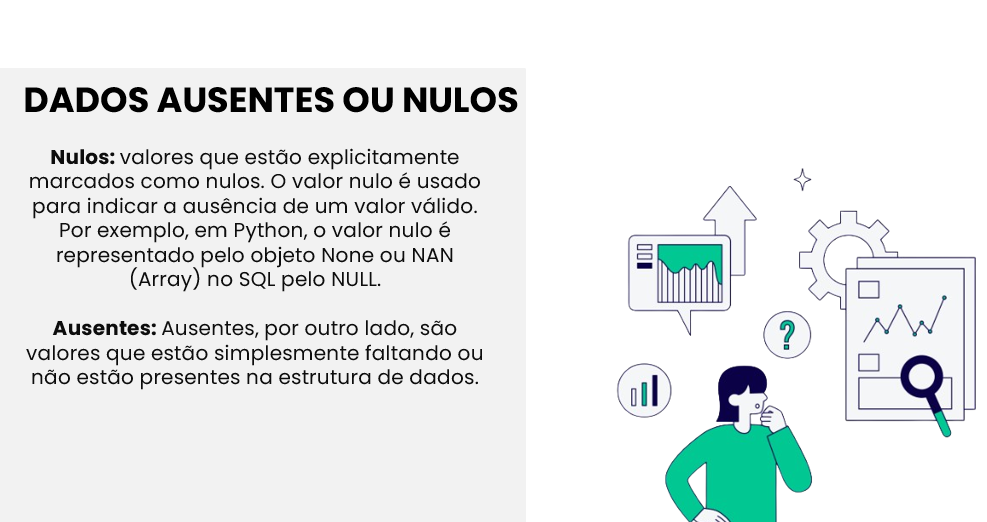

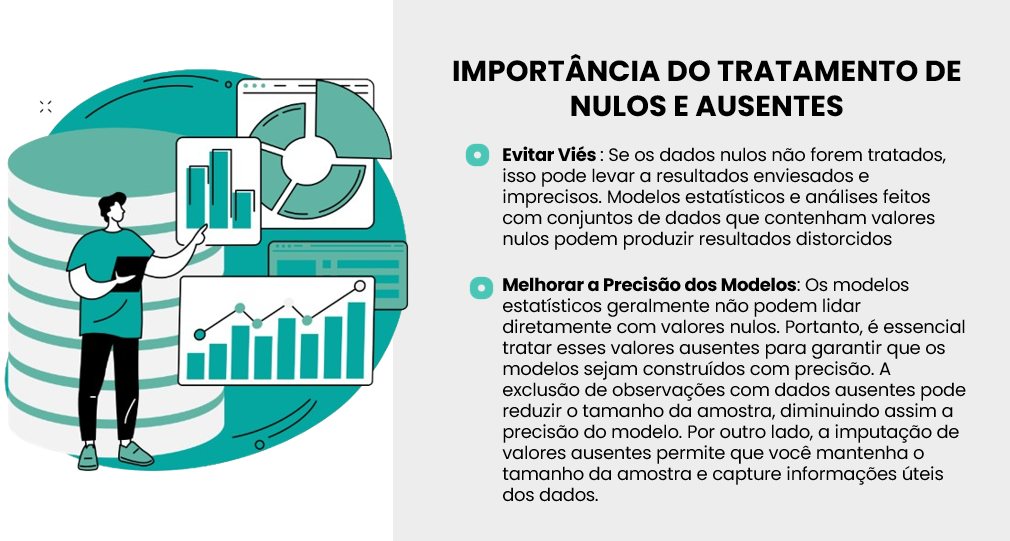

O primeiro passo é identificarmos se temos valores nulos e ausente, após isso aprenderemos como lidar com esses cenários da forma mais adequada possível.

**1.Para verificar se há valores nulos em todo o DataFrame:**

In [ ]:
#Este código retornará True se houver algum valor nulo em qualquer lugar do DataFrame, e False caso contrário.
df.isnull().values.any()

True

**2.Para contar o número de valores nulos em cada coluna:**

In [ ]:
df.isnull().sum()

CustomerId           0
Sobrenome            0
Credit_Score         0
Pais                 0
Genero              10
Idade              206
Tempo_Credito        0
Balance              0
Qtd_Produtos         0
Possui_Cartao        0
Membro_Ativo         0
Salario_Anual    65536
Churn               89
dtype: int64

Parece bastante não? Vamos ver a porcentagem que os valores nulos representam para essas colunas.

**3.Para contar o número de valores nulos em cada coluna:**

In [ ]:
(df.isnull().sum() / len(df)) * 100
# O que fazemos é trazer a soma dos nulos, usar o len que conta os registros e multiplicar por 100 para termos a %

CustomerId        0.000
Sobrenome         0.000
Credit_Score      0.000
Pais              0.000
Genero            0.010
Idade             0.206
Tempo_Credito     0.000
Balance           0.000
Qtd_Produtos      0.000
Possui_Cartao     0.000
Membro_Ativo      0.000
Salario_Anual    65.536
Churn             0.089
dtype: float64

Vamos começar tratando os dados das outras colunas (não churn) para aprendemos quais as opções que temos e conseguirmos ao final da aula identificar qual a ideal para a coluna de Churn.

# 1) Coluna Genero:

Nessa coluna temos apenas 0.01% dos dados faltantes, é muito pouco para uma base tão grande, **nesse caso podemos apenas excluir as linhas faltantes.**

In [ ]:
df[df['Genero'].isnull()]

,CustomerId,Sobrenome,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balance,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
61074,15601008,Y?an,667,France,NaN,33.0,3,0.00,2,1.0,1.0,NaN,0.0
61075,15757895,Ritchie,642,France,NaN,33.0,4,150507.21,1,1.0,1.0,NaN,0.0
61076,15806983,Moss,646,France,NaN,33.0,3,137148.68,1,1.0,0.0,NaN,0.0
61077,15761340,Bullen,593,France,NaN,33.0,4,0.00,2,1.0,1.0,NaN,0.0
61078,15790594,Nnaife,653,France,NaN,33.0,6,0.00,2,1.0,0.0,NaN,0.0
61079,15679024,Hsia,585,France,NaN,33.0,2,97565.74,1,0.0,0.0,NaN,0.0
61080,15751553,Bellucci,758,France,NaN,33.0,9,119782.77,1,1.0,0.0,NaN,0.0
61081,15592578,Ch'ien,679,France,NaN,33.0,7,107499.24,1,1.0,0.0,NaN,0.0
61082,15592714,Tsao,748,France,NaN,33.0,6,0.00,2,1.0,1.0,NaN,0.0
61083,15578788,Ch'ien,516,France,NaN,33.0,3,0.00,1,1.0,1.0,NaN,0.0


In [ ]:
# Excluindo:
df.dropna(subset=['Genero'], inplace=True)
#inplace=True faz com que as alterações sejam feitas diretamente no DataFrame original

In [ ]:
df['Genero'].isnull().sum()

0

# 2) Coluna Idade:

A coluna idade também representa uma % pequena dos nossos dados então podemos realizar a exclusão dessas linhas també:

In [ ]:
# Excluindo:
df.dropna(subset=['Idade'], inplace=True)
#inplace=True faz com que as alterações sejam feitas diretamente no DataFrame original

In [ ]:
df['Idade'].isnull().sum()

0

# 3) Coluna Salário:

Essa coluna é um grande desafio para nós, pois ela tem 65% dos dados dela faltantes.
**É MAIS DA METADE.**

Geralmente quando lidamos com dados faltantes temos duas opções principais:

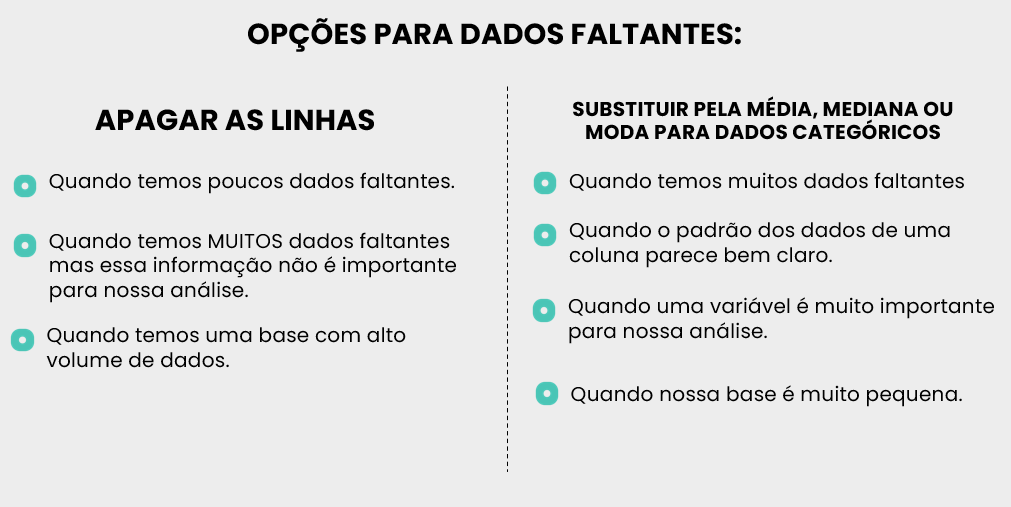

# A vida do profissional de dados é analisar e tomar decisões com base nos valores analisados.
# Muitas vezes não temos sempre a resposta em um livro ou curso do que é mais certo, o profissional precisa ser critico e analisar cada caso.

Já sabemos que:



*   Nossa base de dados é grande - então excluir poderia ser uma opção.
*   Como se trata de um problema de crédito, voltado financeiro, podemos INFERIR que salário pode ser uma variável importante - então substituir seria uma opção.
*   Perderiamos mais da metade dos dados caso optassemos por excluir todas as linhas em que salário é nulo - então substituir segue sendo a melhor opção.




In [ ]:
#Para termos certeza teremos que analisar mais a fundo a distribuição dos dados.
df['Salario_Anual'].mean()

10280264.388924362

A média do salário anual é de 1.02 Milhões

In [ ]:
#Para termos certeza teremos que analisar mais a fundo a distribuição dos dados.
df['Salario_Anual'].median()

10787643.5

A mediana está próxima da media, com 1.07 Milhões.
Esse é um bom sinal, em um primeiro momento os dados parecem bem distribuidos.

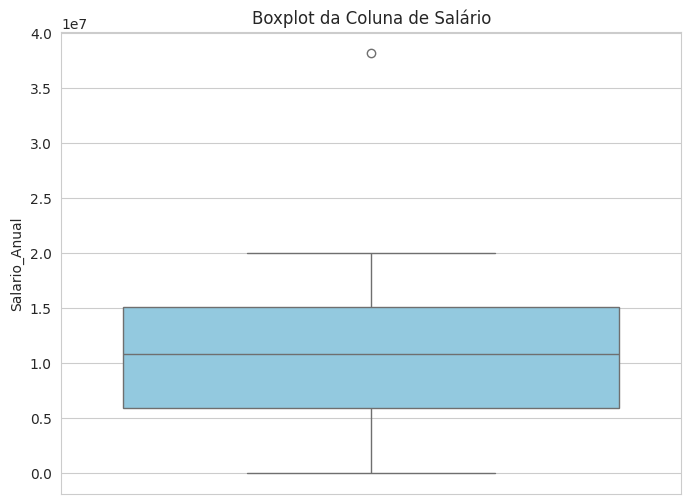

In [ ]:
# é uma função da biblioteca Seaborn que define o estilo estético dos gráficos produzidos por Seaborn. Neste caso, 'whitegrid' é um dos estilos disponíveis em Seaborn
sns.set_style('whitegrid')

# Plota o boxplot da coluna de salário
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Salario_Anual', color='skyblue')
plt.title('Boxplot da Coluna de Salário')
plt.ylabel('Salario_Anual')
plt.show()

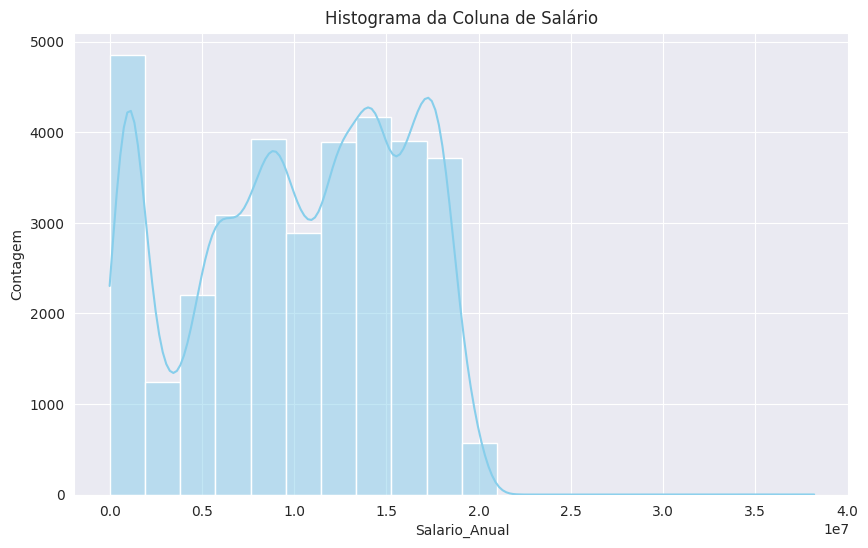

In [ ]:
sns.set_style('darkgrid')

# Plotando um histograma dos salários para analisarmos a distribuição dos dados
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Salario_Anual', bins=20, kde=True, color='skyblue')
plt.title('Histograma da Coluna de Salário')
plt.xlabel('Salario_Anual')
plt.ylabel('Contagem')
plt.show()

Nós identificamos que existe um outlier nos dados de salário.
Para termos uma mediana mais justa é interessante calcularmos ela sem esse outlier. (Na próxima aula aprenderemos a tratar outliers)

**Então vamos trazer a mediana dos salários removendo salários acima de 2 milhões.**

In [ ]:
salarios_abaixo_2milhoes = df[df['Salario_Anual'] < 2000000]
salarios_abaixo_2milhoes['Salario_Anual'].median()

1011687.0

In [ ]:
mediana_salario_abaixo_2milhoes = df[df['Salario_Anual'] < 2000000]['Salario_Anual'].median()
# Substitui os valores faltantes na coluna de salário pela mediana
df['Salario_Anual'].fillna(mediana_salario_abaixo_2milhoes, inplace=True)

In [ ]:
df['Salario_Anual'].isnull().sum()

0

In [ ]:
df['Salario_Anual'].median()

1011687.0

Vemos que a mediana cai um pouco sem a presença do outlier.
Então substituiremos os dados falantes pelo valor da mediana sem os outliers.

Caso não houvesse outlier, poderiamos substituir diretamente pela mediana.

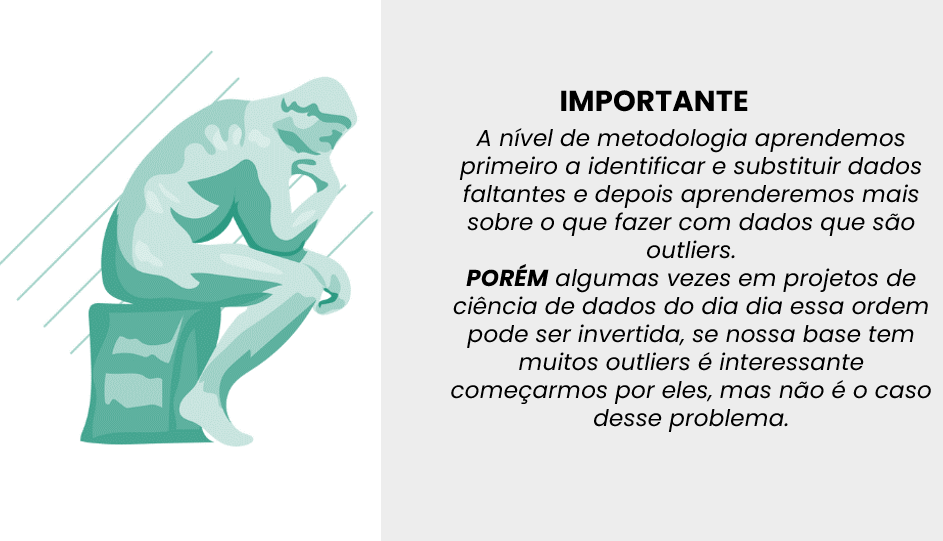

# 4) Churn:

Agora que você aprendeu dois métodos que usamos para substituir valores falantes está pronto(a) para analisar a coluna mais importante que temos, a de Churn!

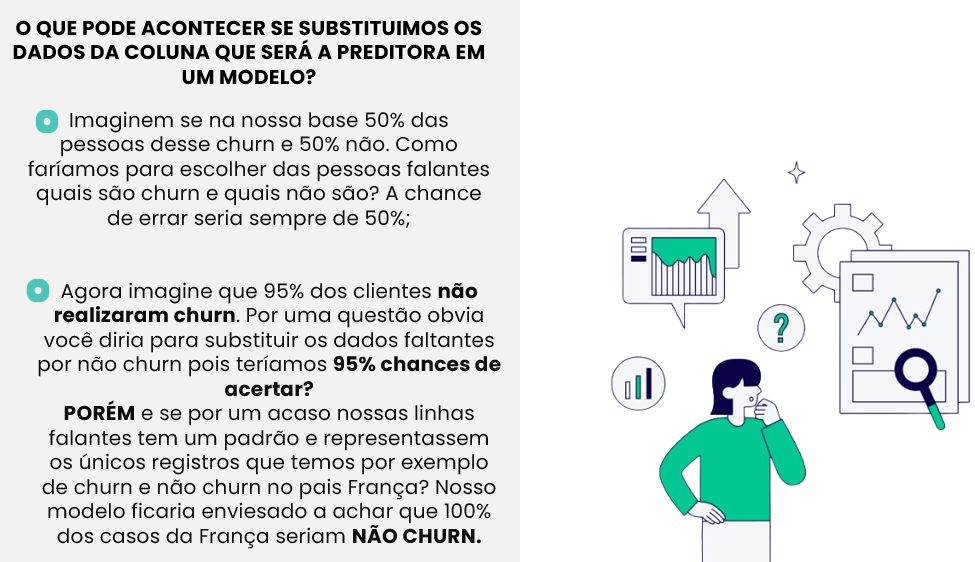

Bom, são muitas variáveis para se pensar e Ciência de Dados é isso!
Como representam apenas 0.08% dos nosso dados eu indicaria para excluirmos as linhas sem registro PORÉM no dia dia vocês se depararão com cenários onde o volume é maior, então vamos analisar juntos se a nossa decisão é a mais certa!

<Axes: xlabel='Churn', ylabel='Count'>

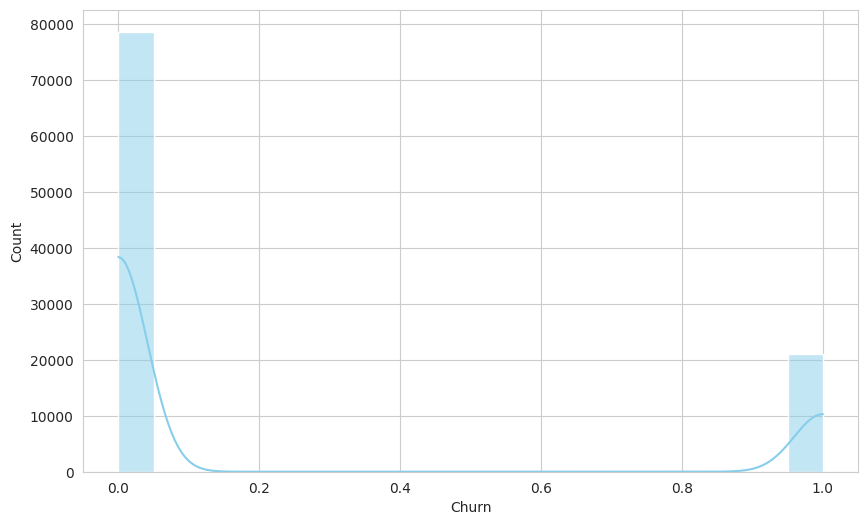

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Churn', bins=20, kde=True, color='skyblue')

Lembra que não trasnformamos ainda o dataframe original em Inteiro essa coluna? Por isso temos os pontos decimais no gráfico.

Fica evidente que temos muitos mais casos de Não Churn que seria 0 do que Churn que seria 1.

In [ ]:
df['Churn'].value_counts(normalize=True) * 100

0.0    78.854254
1.0    21.145746
Name: Churn, dtype: float64

Agora vamos decobrir se achamos algum padrão de repetição nos dados falantes!

In [ ]:
df[df['Churn'].isnull()]

,CustomerId,Sobrenome,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balance,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
406,15576928,Walsh,604,Spain,Female,23.0,6,0.00,1,1.0,0.0,1011687.0,NaN
407,15766552,Rossi,640,Spain,Male,23.0,4,0.00,2,0.0,1.0,1011687.0,NaN
408,15674833,Onio,605,Spain,Male,23.0,5,181671.16,2,1.0,1.0,1011687.0,NaN
409,15683534,Boulger,712,Spain,Female,23.0,7,110805.42,2,0.0,1.0,1011687.0,NaN
410,15677955,Hs?eh,673,Spain,Female,23.0,1,0.00,2,1.0,1.0,1011687.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60582,15798521,Ch'en,675,France,Male,33.0,2,0.00,2,1.0,0.0,1011687.0,NaN
60583,15706263,Onyemauchechukwu,711,France,Male,33.0,7,0.00,2,1.0,1.0,1011687.0,NaN
60584,15603319,Onyekachi,712,France,Male,33.0,4,0.00,2,1.0,0.0,1011687.0,NaN
60585,15677512,Nwora,696,France,Male,33.0,2,111432.14,1,1.0,0.0,1011687.0,NaN


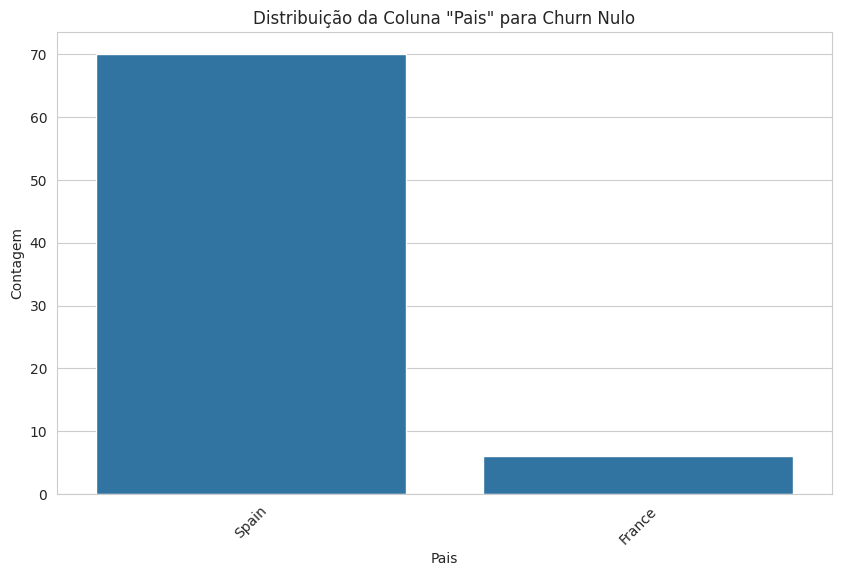

In [ ]:
# Seleciona todas as linhas onde a coluna 'Churn' é nula
df_churn_nulo = df[df['Churn'].isnull()]

# Plotando a distribuição dos paises
plt.figure(figsize=(10, 6))
sns.countplot(data=df_churn_nulo, x='Pais')
plt.title('Distribuição da Coluna "Pais" para Churn Nulo')
plt.xlabel('Pais')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

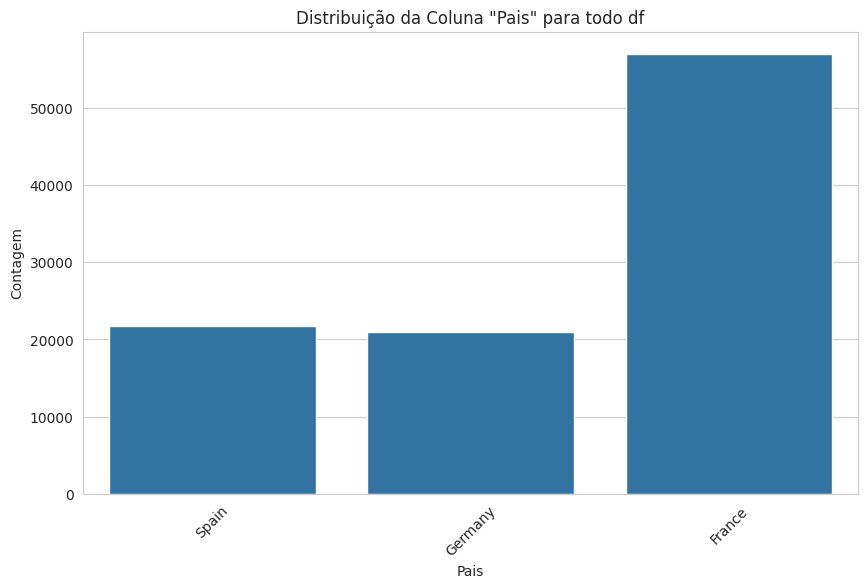

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pais')
plt.title('Distribuição da Coluna "Pais" para todo df')
plt.xlabel('Pais')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

**Alerta, vemos um  vies maior para paises da Spain.**

Nesse caso vamos optar por remover as linhas nulas para evitar vies no modelo!

In [ ]:
df.dropna(subset=['Churn'], inplace=True)

In [ ]:
df['Churn'].isnull().sum()

0

In [ ]:
df.isnull().sum()

CustomerId       0
Sobrenome        0
Credit_Score     0
Pais             0
Genero           0
Idade            0
Tempo_Credito    0
Balance          0
Qtd_Produtos     0
Possui_Cartao    0
Membro_Ativo     0
Salario_Anual    0
Churn            0
dtype: int64

E agora sim podemos transformar essa coluna em inteiro!

In [ ]:
df['Churn'] = df['Churn'].astype(int)

# **MÓDULO 14 - AULA 4**
# Outros Tipos de Tratamento

Outro ponto interessante é mantermos os nomes das colunas de forma padronizada, por exemplo, quase todas nossas colunas tem nome em português porém a coluna balance está em inglês.
É interessante padronizarmos.

In [ ]:
# Para isso usamos a função rename:
df.rename(columns={'Balance': 'Balanco'}, inplace=True)

In [ ]:
df.head()

,CustomerId,Sobrenome,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,15813451,Fleetwood-Smith,677,Spain,Male,18.0,5,134796.87,2,1.0,0.0,1011687.0,0
1,15641688,Collier,644,Spain,Female,18.0,7,0.00,1,0.0,1.0,1011687.0,0
2,15757821,Burgess,641,Spain,Male,18.0,1,0.00,2,0.0,1.0,1011687.0,0
3,15673180,Onyekaozulu,826,Spain,Male,18.0,2,0.00,2,0.0,1.0,1011687.0,0
4,15664543,Tuan,774,Spain,Female,18.0,1,185891.54,1,1.0,0.0,1011687.0,0


Lembra que vimos na primeira aula sobre termos categorias com acentuação ou letras maisculas?
Vamos verificar se nossas colunas categóricas contém esses valores.

In [ ]:
df['Pais'].unique()

array(['Spain', 'SPAIN', 'Germany', 'Germani', 'France'], dtype=object)

Aqui encontramos 2 problemas que exigem tratamento de dados:

 * Para Spain temos tanto valor totalmente em caixa alta quanto valores apenas com a primeira letra em caixa alta.
 * Para Germany temos valores escritos de forma errada, com i, esse erro terá a uma solução parecida a que aplicariamos caso tivessemos acentuações.

In [ ]:
# Para transformar todos os dados da coluna pais em caixa baixa:
df['Pais'] = df['Pais'].str.lower()
df['Pais'].unique()

array(['spain', 'germany', 'germani', 'france'], dtype=object)

E se quisessemos em caixa alta?

In [ ]:
df['Pais'] = df['Pais'].str.upper()
df['Pais'].unique()

array(['SPAIN', 'GERMANY', 'GERMANI', 'FRANCE'], dtype=object)

Agora vamos fazer a substituição dos valores errados na coluna de pais.

In [ ]:
# Para isso usaremos a função replace
df['Pais'] = df['Pais'].replace('GERMANI', 'GERMANY')

In [ ]:
df['Pais'].unique()

array(['SPAIN', 'GERMANY', 'FRANCE'], dtype=object)

Agora vamos verificar se nossos outros dados categóricos estão com alguma inconsistência:

In [ ]:
df['Genero'].unique()

array(['Male', 'Female'], dtype=object)

Você deve estar se perguntando o motivo de eu não ter checado a coluna Sobrenome.
Bem, nome acaba sendo um dado sensível e pense, em uma base com tantos dados não será importante para nós a coluna de nomes, podemos inclusive retirar da nossa base.

# É muito importante que antes de avançarem em projetos vocês removam todas colunas que não serão importantes!

In [ ]:
df.drop(columns=['Sobrenome'], inplace=True)

In [ ]:
df.drop(columns=['CustomerId'], inplace=True)